In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
# %%

store = pd.read_csv("store-sales/store.csv", index_col=0)
train = pd.read_csv("store-sales/train.csv")
# %%



In [3]:
train

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

<AxesSubplot:xlabel='Date'>

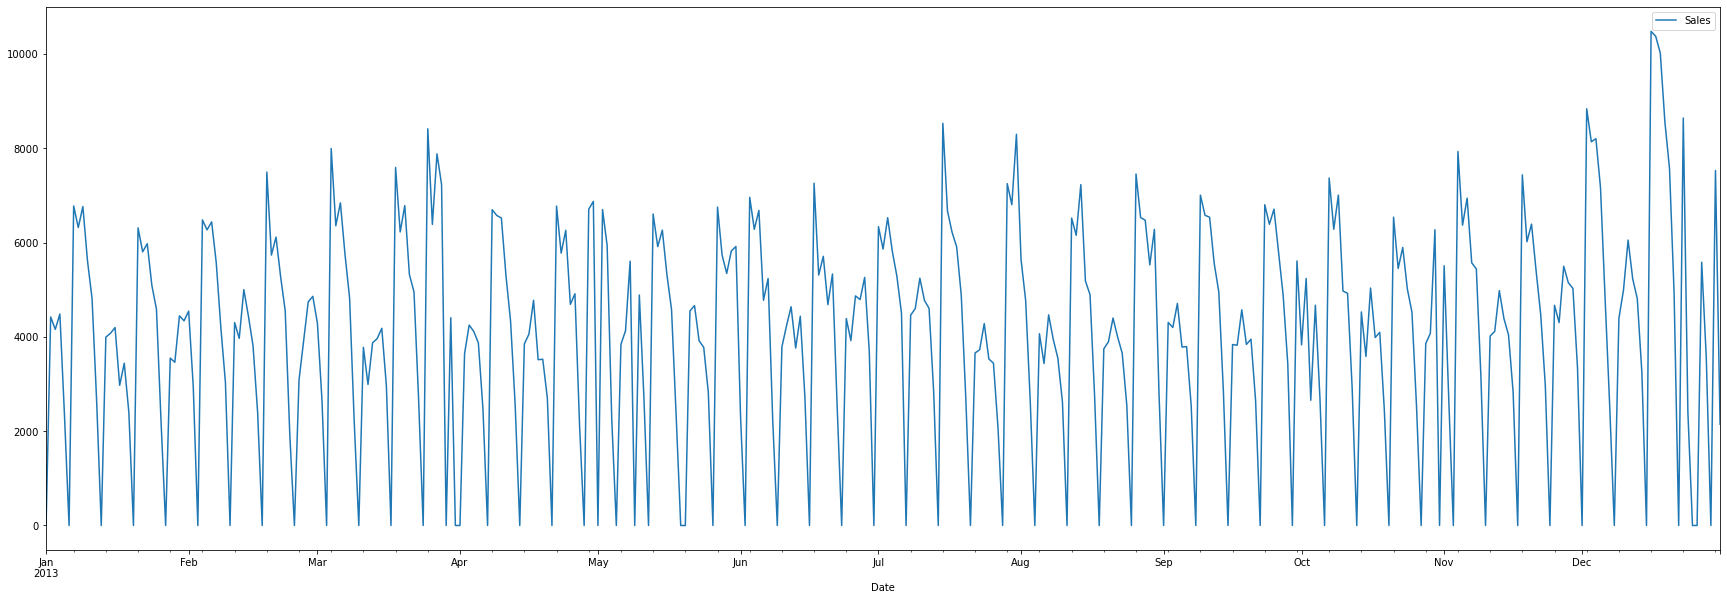

In [4]:
train["Date"] = pd.to_datetime(train["Date"])

pv_table1 = pd.pivot_table(train, values="Sales", index= ["Store","Date"])
plt.figure(figsize=(30,10))
ax = plt.subplot()
pv_table1.loc[(2,"2013")].plot(ax = ax )

In [6]:
#train_c = pd.merge(store, train, on="Store")
train_c = train.copy()
train_c["Date"] = pd.to_datetime(train["Date"])
train_c.set_index("Date", inplace=True)
train_c['year'] = train_c.index.year
train_c['month'] = train_c.index.month
train_c['day'] = train_c.index.day
train_c['week_of_year'] = train_c.index.weekofyear

train_c




Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday  year  month  day  week_of_year  
Date                                                       
2015-07-31              1  2015      7   31            31  
2015-07-31              1  2015      7   31            31  
2015-07-31              1  2015      7   31            31  
2015-07-31              1  2015      7   31            31  
2015-07-31              1  2015      7   31            31  
...                   ...   ...    ...  ...           ...  
2013-01-01              1  2013      1    1             1  
2013-01-01              1  2013      1    1             1  
2013-01-01              1  2013      1    1             1  
2013-01-01              1  2013      1    1             1  
2013-01-01              1  2013      1    1             1  

[1017209 rows x 12 columns]

In [9]:
train_c.groupby("Store")["Sales"].describe().head()

count         mean          std  min      25%     50%       75%  \
Store                                                                    
1      942.0  3945.704883  2015.417840  0.0  3588.25  4373.5   5220.00   
2      942.0  4122.991507  2363.628674  0.0  2806.75  4395.5   5804.50   
3      942.0  5741.253715  3298.782559  0.0  4247.50  5892.0   8152.75   
4      942.0  8021.769639  4012.592818  0.0  7322.50  9062.0  10281.00   
5      942.0  3867.110403  2389.609890  0.0  2027.00  4180.0   5419.25   

           max  
Store           
1       9528.0  
2      10682.0  
3      15689.0  
4      17412.0  
5      11692.0

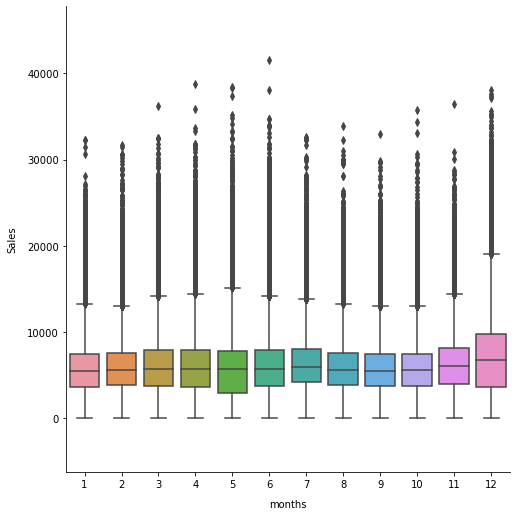

In [52]:
g = sns.catplot(x="month", y="Sales", kind="box", data=train_c, height=7)
g.set_axis_labels("months", "Sales", labelpad=10)
g.ax.margins(.15)
#g.despine(trim=True)

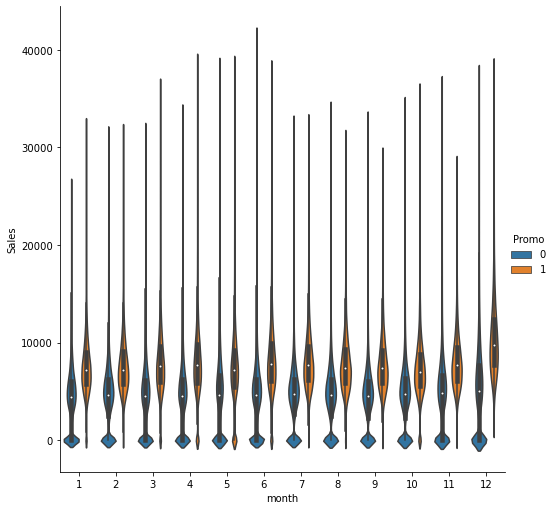

In [51]:
g2 = sns.catplot(x="month", y="Sales", kind="violin", data=train_c, hue="Promo",height=7)


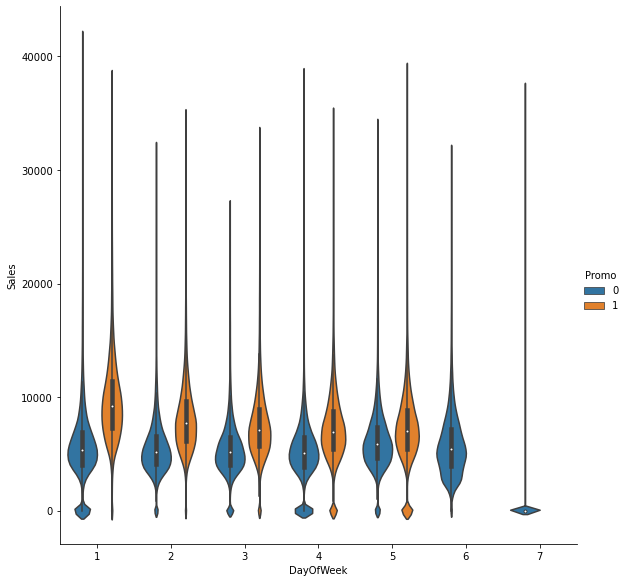

In [54]:
g3 = sns.catplot(data=train_c, x="DayOfWeek", y="Sales", hue="Promo",kind="violin", height = 8)
g3.set_axis_labels("Days of the week", "Sales", labelpad=10)
g3.ax.margins(.15)

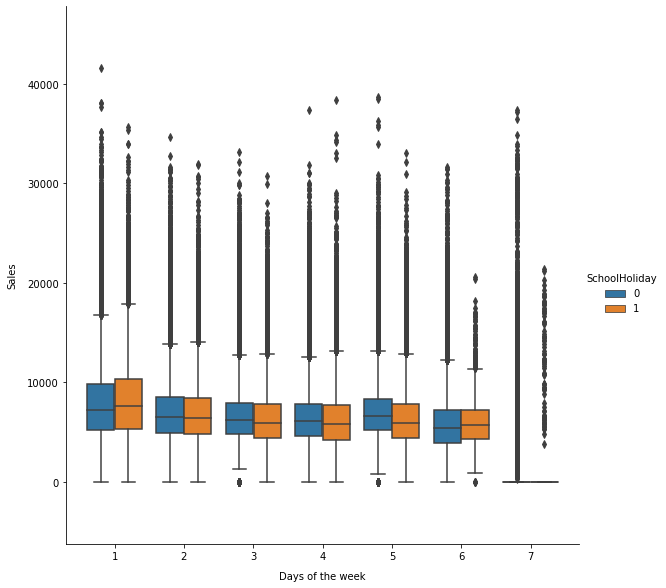

In [61]:
g = sns.FacetGrid(train_c, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "year", "Sales");

g4 = sns.catplot(data=train_c, x="months", y="Sales", hue="Promo",kind="box", height = 8)
g4.set_axis_labels("Days of the week", "Sales", labelpad=10)
g4.ax.margins(.15)

In [5]:
train_c.groupby(["Store","month"])["Sales"].describe()

store1 = train_c[train_c["Store"]==1]

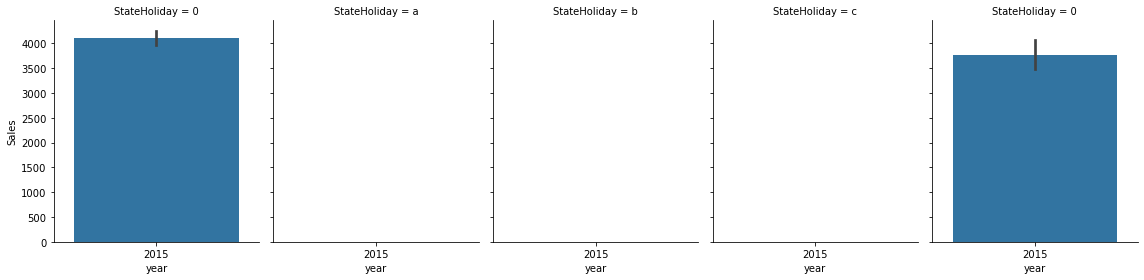

In [7]:
g = sns.FacetGrid(store1, col="StateHoliday", height=4, aspect=.8)
g.map(sns.barplot, "year", "Sales");

In [ ]:
g = sns.FacetGrid(train_c, col="Promo", height=4, aspect=.8)
g.map(sns.barplot, "Customer", "Sales");

In [12]:
store1.groupby("month")["Sales"].sum()

month
7    3716854
Name: Sales, dtype: int64

In [21]:
train

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]